# NBA All-Star Weekend Challenge

Your task...answer the following questions given the dataset given about the NBA All-Star Game from the year 2000 - 2016

Become more familiar with the dataset <a href="https://www.kaggle.com/fmejia21/nba-all-star-game-20002016">here</a>

Once completed, commit this notebook to github and submit the link to the google classroom assignment.

<a href="https://classroom.google.com/u/2/c/NDc4MzEzMjI5Nzla/a/NTE3OTYxNzM2OTNa/details">Google Classroom</a>

### Retrieve Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./NBA All Stars 2000-2016 - Sheet1.csv')

In [3]:
df.head()

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
1,2016,James Harden,SG,6-5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States


### Clean Data

In [4]:
df.dtypes

Year                 int64
Player              object
Pos                 object
HT                  object
WT                   int64
Team                object
Selection Type      object
NBA Draft Status    object
Nationality         object
dtype: object

#### Make sure there are no null values

In [5]:
df.isna().sum()

Year                0
Player              0
Pos                 0
HT                  0
WT                  0
Team                0
Selection Type      0
NBA Draft Status    0
Nationality         0
dtype: int64

#### Remove space from column headers

In [6]:
df.rename(columns=lambda x:x.replace(' ', '_').lower(), inplace=True)
df.columns

Index(['year', 'player', 'pos', 'ht', 'wt', 'team', 'selection_type',
       'nba_draft_status', 'nationality'],
      dtype='object')

In [7]:
df.to_csv('df_v2.csv', index=False)
df = pd.read_csv('df_v2.csv')
df

,year,player,pos,ht,wt,team,selection_type,nba_draft_status,nationality
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
1,2016,James Harden,SG,6-5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States
...,...,...,...,...,...,...,...,...,...
434,2000,Antonio McDyess,F,6-9,245,Denver Nuggets,Western All-Star Coaches Selection,1995 Rnd 1 Pick 2,United States
435,2000,Gary Payton,G,6-4,180,Seattle SuperSonics,Western All-Star Coaches Selection,1990 Rnd 1 Pick 2,United States
436,2000,Rasheed Wallace,FC,6-11,230,Portland Trail Blazers,Western All-Star Coaches Selection,1995 Rnd 1 Pick 4,United States
437,2000,David Robinson,C,7-1,250,San Antonio Spurs,Western All-Star Coaches Selection,1987 Rnd 1 Pick 1,United States


# What is the average weight of all players who played during this time?

#### Change the copy of the average to a float and round to 2 decimal places

In [8]:
avg_weight = round(float(df.wt.mean()), 2)
avg_weight

228.75

# What team is represented the most during this time?

In [9]:
counted_teams = {}
for team in list(df.team):
    counted_teams[team] = list(df.team).count(team)
    
print(counted_teams)
max_key = max(counted_teams, key=counted_teams.get)
print(f'\n\nThe team most represented at the NBA All-Star Games from 2000 to 2016 was the {max_key}.')

{'Golden State Warriors': 11, 'Houston Rockets': 20, 'San Antonio Spurs': 25, 'New Orleans Pelicans': 4, 'Oklahoma City Thunder': 13, 'Sacramento Kings': 11, 'Memphis Grizzlies': 6, 'Los Angeles Clippers': 14, 'Utah Jazz': 9, 'Cleveland Cavaliers': 17, 'Toronto Raptors': 16, 'Milwaukee Bucks': 5, 'Chicago Bulls': 12, 'Boston Celtics': 26, 'Washington Wizards': 13, 'Indiana Pacers': 15, 'Charlotte Hornets': 2, 'Atlanta Hawks': 18, 'Miami Heat': 28, 'New York Knicks': 10, 'Detroit Pistons': 15, 'Los Angeles Lakers': 25, 'Portland Trail Blazers': 10, 'Dallas Mavericks': 18, 'Minnesota Timberwolves': 12, 'Brooklyn Nets': 2, 'Philadelphia Sixers': 11, 'Orlando Magic': 14, 'New Jersey Nets': 12, 'Phoenix Suns': 18, 'Denver Nuggets': 9, 'New Orleans Hornets': 9, 'Charlotte Bobcats': 1, 'Seattle SuperSonics': 8}


The team most represented at the NBA All-Star Games from 2000 to 2016 was the Miami Heat.


# What draft class is represeted the most during this time?

In [10]:
draft_class = []
counted_class = {}

for draft in df.nba_draft_status:
    # slice Pick Number from NBA Draft Status column
    draft_class.append(draft.split(" Pick")[0])
    
    # iterate over the new list
    for dclass in draft_class:
        counted_class[dclass] = draft_class.count(dclass)
    
print(counted_class)
max_key = max(counted_class, key=counted_class.get)
print(f'\n\n The class most represented at the NBA All-Star games from 2000 to 2016 was the {max_key}.')

{'2009 Rnd 1': 19, '2007 Rnd 1': 14, '2011 Rnd 1': 13, '2012 Rnd 1': 7, '2008 Rnd 1': 16, '2010 Rnd 1': 12, '2012 Rnd 2': 2, '2007 Rnd 2': 3, '2008 Rnd 2': 1, '2003 Rnd 1': 49, '2013 Rnd 1': 1, '2011 Rnd 2': 2, '2006 Rnd 1': 15, '2006 Rnd 2': 4, '2001 Rnd 1': 23, '1996 Rnd 1': 59, '2005 Rnd 1': 16, '2003 Rnd 2': 2, '1997 Rnd 1': 25, '1998 Rnd 1': 32, '2004 Rnd 1': 13, '1995 Rnd 1': 19, '2002 Rnd 1': 16, '1999 Rnd 2': 2, '1994 Rnd 1': 10, '1992 Rnd 1': 11, '1998 Rnd 2': 2, '2002 Rnd 2': 2, '1999 Rnd 1': 17, '2001 Rnd 2': 4, '1996 NBA Draft, Undrafted': 4, '1998 NBA Draft, Undrafted': 2, '1993 Rnd 1': 6, '2000 Rnd 2': 1, '2000 Rnd 1': 2, '1984 Rnd 1': 2, '1990 Rnd 1': 3, '1991 Rnd 1': 2, '1985 Rnd 1': 2, '1990 Rnd 2': 1, '1988 Rnd 3': 1, '1987 Rnd 1': 1, '1989 Rnd 1': 1}


 The class most represented at the NBA All-Star games from 2000 to 2016 was the 1996 Rnd 1.


In [11]:
# Noticed a discrepancy with the nba_draft_class clumns but decided to leave it

df[~df.nba_draft_status.str.contains('Pick')]

,year,player,pos,ht,wt,team,selection_type,nba_draft_status,nationality
309,2005,Ben Wallace,FC,6-9,240,Detroit Pistons,Eastern All-Star Coaches Selection,"1996 NBA Draft, Undrafted",United States
334,2004,Ben Wallace,FC,6-9,240,Detroit Pistons,Eastern All-Star Coaches Selection,"1996 NBA Draft, Undrafted",United States
346,2003,Brad Miller,C,7-0,261,Sacramento Kings,Western All-Star Coaches Selection,"1998 NBA Draft, Undrafted",United States
348,2003,Ben Wallace,FC,6-9,240,Detroit Pistons,Eastern All-Star Fan Vote Selection,"1996 NBA Draft, Undrafted",United States
360,2002,Ben Wallace,FC,6-9,240,Detroit Pistons,Eastern All-Star Fan Vote Selection,"1996 NBA Draft, Undrafted",United States
371,2002,Brad Miller,C,7-0,261,Indiana Pacers,Eastern All-Star Coaches Selection,"1998 NBA Draft, Undrafted",United States


# Are foriegn players more prevalent in the All-Star Game during this time?

In [12]:
usa_players = df.nationality.str.contains('United States').count()

In [13]:
foreign_players = len(df[~df.nationality.str.contains('United States')])

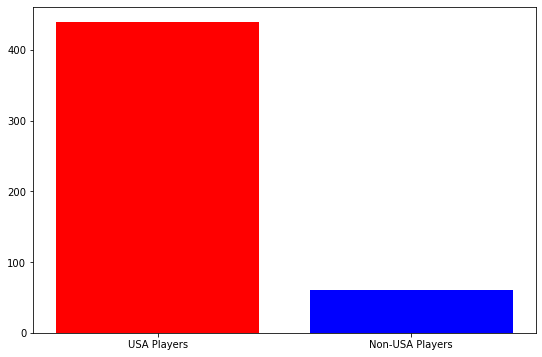

In [14]:
plt.subplots(figsize=(9,6))
plt.bar(['USA Players', 'Non-USA Players'], [usa_players, foreign_players], color=['red', 'blue']);

#### Clean nationality column

In [15]:
df.nationality.value_counts()

United States                        365
Germany                               13
Spain                                  9
Canada\nSouth Africa                   8
China                                  8
France                                 6
United States\nAustralia               4
Dominican Republic\nUnited States      4
Serbia\nGreece                         3
Democratic Republic of the Congo       2
Argentina                              2
Germany\nUnited States                 2
Lithuania                              2
England\nSouth Sudan                   2
France\nUnited States                  2
United States\nSpain                   1
Canada                                 1
Serbia                                 1
Greece\nNigeria                        1
Turkey                                 1
United States\nGermany                 1
Russia                                 1
Name: nationality, dtype: int64

In [16]:
df1 = pd.DataFrame(columns=df.columns)

for record in df.index:
    r = df.iloc[record]
    new_record = pd.DataFrame([
        [r.year, r.player, r.pos, r.ht, r.wt, r.team, r.selection_type,
       r.nba_draft_status, r.nationality.split('\n')]
    ], columns=df.columns)
    df1 = df1.append(new_record)

df1.reset_index(inplace=True)

In [17]:
df1.drop(['index'], axis=1, inplace=True)

In [18]:
df1.nationality.value_counts()

[United States]                        365
[Germany]                               13
[Spain]                                  9
[China]                                  8
[Canada, South Africa]                   8
[France]                                 6
[United States, Australia]               4
[Dominican Republic, United States]      4
[Serbia, Greece]                         3
[Lithuania]                              2
[France, United States]                  2
[Germany, United States]                 2
[Argentina]                              2
[England, South Sudan]                   2
[Democratic Republic of the Congo]       2
[Russia]                                 1
[Turkey]                                 1
[Greece, Nigeria]                        1
[United States, Germany]                 1
[Serbia]                                 1
[United States, Spain]                   1
[Canada]                                 1
Name: nationality, dtype: int64

In [19]:
df = df1
df.head()

,year,player,pos,ht,wt,team,selection_type,nba_draft_status,nationality
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,[United States]
1,2016,James Harden,SG,6-5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,[United States]
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,[United States]
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,[United States]
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,[United States]


In [20]:
df.dtypes

year                object
player              object
pos                 object
ht                  object
wt                  object
team                object
selection_type      object
nba_draft_status    object
nationality         object
dtype: object

# How often are the Western All-Stars voted in by fans?

In [21]:
# Western All-Star Fan Vote Selection
overall_percent = len(df.query('selection_type == "Western All-Star Fan Vote Selection"'))/len(df)*100
print(f'{round(overall_percent, 2)}% of players are the Western All-Stars voted by fans.')

19.36% of players are the Western All-Stars voted by fans.


# How many times does Steph Curry make the All-Star game during this time period?

In [22]:
total_years = 17
steph_years = df.query('player == "Stephen Curry"')
print(f'Steph Curry has made the All-Star games {len(steph_years)} times from 2000 to 2016.')

Steph Curry has made the All-Star games 4 times from 2000 to 2016.


# How many Shooting Gaurds have made the All-Star game during this time?

In [23]:
sg = len(df.query('pos =="SG"'))
print(f'{sg} Shooting Gaurds have made the All-Star games from 2000 to 2016.')

57 Shooting Gaurds have made the All-Star games from 2000 to 2016.


# How many Chicago Bulls players have made the All-Star Game during this time period?

In [35]:
set(df.query('team == "Chicago Bulls"').player)

{'Derrick Rose', 'Jimmy Butler', 'Joakim Noah', 'Luol Deng', 'Pau Gasol'}

In [34]:
bulls = len(set(df.query('team == "Chicago Bulls"').player))
print(f'{bulls} players from the Chicago Bulls have made the All-Star games from 2000 to 2016.')

5 players from the Chicago Bulls have made the All-Star games from 2000 to 2016.
